# Make PED file for prostate STIX DB

09/24/24, Jake Krol

10/08/24 update: Index only cancer samples, not normal. Make PED for cancer only

In [23]:
import pandas as pd
import numpy as np
import os
import itertools
import re
from collections import Counter

In [24]:
os.chdir('/data/jake/gene-fusion/python')

In [25]:
meta = "../data/meta/icgc25k-legacy-data-locations.tsv"
dir_prostate="/data/stix/1kg/cancer_data/prostate/prostate_sort"
#bed_files = [os.path.join(dir_data, f) for f in os.listdir(dir_data)]
bed_files = os.listdir(dir_prostate)
sample_ids = [i.split('.')[0] for i in bed_files]
print(len(bed_files))
print(bed_files[0:5])
print(sample_ids[0:5])

257
['FI45874.excord.bed.gz', 'FI34058.excord.bed.gz', 'FI45517.excord.bed.gz', 'FI30018.excord.bed.gz', 'FI31305.excord.bed.gz']
['FI45874', 'FI34058', 'FI45517', 'FI30018', 'FI31305']


In [26]:
df_icgc = pd.read_csv(meta,sep='\t').dropna(subset='File_ID')
df_icgc.drop(df_icgc.columns[0],axis=1,inplace=True)
df_icgc.columns = [s.lower() for s in df_icgc.columns]
print(df_icgc.shape)
df_icgc.head()

(131770, 22)


/tmp/ipykernel_2808127/1259175933.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_icgc = pd.read_csv(meta,sep='\t').dropna(subset='File_ID')


,objectid,file_id,file_name,icgc_donor,icgc_specimen_id,specimen_type,icgc_sample_id,project,study,data_type,...,analysisid,ega_dataset_id,ega_analysis_id,ega_file_id,pcawg,ega_run_id,sftp_location,gdc_id,pdc_id,location
0,413b0e61-fe0b-5c85-b120-407e0050b9a8,FI278747,ba5667da-7688-4931-bdb7-d65f391caf60.embl-dell...,DO35555,SP78676,Primary tumour - solid tissue,SA413338,PBCA-DE,PCAWG,VCF,...,4ef54f75-d71f-48e0-a898-d956490cb18b,NaN,NaN,NaN,whitelist,NaN,PCAWG/dkfz_embl_calls/PCAWG.WGS.icgc.dkfz_embl...,NaN,NaN,SFTP
1,3d30239f-68c4-5954-9e66-99dd9a4ec208,FI665386,d182b67c-c622-11e3-bf01-24c6515278c0.consensus...,DO45239,SP99201,Primary tumour - solid tissue,SA501481,LIRI-JP,PCAWG,VCF,...,6645e983-6f89-434f-80c2-0b96a845ee36,NaN,NaN,NaN,whitelist,NaN,PCAWG/consensus_snv_indel,NaN,NaN,SFTP
2,413a6d50-7ac5-5bdd-8ff6-1bbfc394e42e,FI723646,90347c06c20ad196a3f3c29073bce33f.BD28T_GCCAAT_...,DO222889,SP129239,Primary tumour - solid tissue,SA562210,BTCA-JP,NaN,FASTQ,...,EGAR00001256174,NaN,NaN,NaN,NaN,EGAR00001256174,NaN,NaN,NaN,EGA
3,413bcbe7-cfc8-5368-bdc9-878268030be0,FI725451,68e1c1bb05ee27f7de7b8fa9234fe18c.BD14T_GACCA_L...,DO222467,SP128248,Primary tumour - solid tissue,SA562163,BTCA-JP,NaN,FASTQ,...,EGAR00001255656,NaN,NaN,NaN,NaN,EGAR00001255656,NaN,NaN,NaN,EGA
6,3d389a8b-3eb7-585f-b3d2-1169e079dee3,FI371415,c20cb5c8-a6d0-4150-b72b-3f7e8909d72b.broad-sno...,DO35572,SP78717,Primary tumour - solid tissue,SA413504,PBCA-DE,PCAWG,VCF,...,5e4b8f2f-50cb-4fc1-83a9-21235c29d1ad,NaN,NaN,NaN,whitelist,NaN,PCAWG/broad_calls/PCAWG.WGS.icgc.broad.metadat...,NaN,NaN,SFTP


In [27]:
df_icgc_prostate = df_icgc[df_icgc['file_id'].isin(sample_ids)].reset_index(drop=True)
df_icgc_prostate = df_icgc_prostate[[df_icgc_prostate.columns[1], df_icgc_prostate.columns[0]] + list(df_icgc_prostate.columns[2:])]
print(df_icgc_prostate.shape)
df_icgc_prostate.head()

(257, 22)


,file_id,objectid,file_name,icgc_donor,icgc_specimen_id,specimen_type,icgc_sample_id,project,study,data_type,...,analysisid,ega_dataset_id,ega_analysis_id,ega_file_id,pcawg,ega_run_id,sftp_location,gdc_id,pdc_id,location
0,FI28636,69339f0b-9a4a-5564-8358-70f33386030a,2feefd57350ddcc44473b78a60e14f84.bam,DO51053,SP112792,Normal - blood derived,SA530443,PRAD-CA,PCAWG,BAM,...,46e26175-d23f-47fd-a8ae-0614125a3394,EGAD00001002128,EGAZ00001223176,EGAF00001084795,whitelist,NaN,NaN,NaN,NaN,EGA
1,FI38336,51267957-9b9b-5f7a-b8cf-2c44f7c4697a,7402654effa3a9f010236b0cadd04ce3.bam,DO51954,SP114917,Metastatic tumour - lymph node,SA538889,PRAD-UK,PCAWG,BAM,...,24002e54-f8ba-4848-ba7a-ffcdd572b152,EGAD00001002126,EGAZ00001224905,EGAF00001156874,whitelist,NaN,NaN,NaN,NaN,EGA
2,FI29599,f52c0520-db54-50a5-ae48-6c4b0112ceea,063c8207682a6b9dbaf696adc79b8d21.bam,DO51048,SP112783,Primary tumour - solid tissue,SA530434,PRAD-CA,PCAWG,BAM,...,f56599c3-f644-4f75-b022-181c97d06e1a,EGAD00001002128,EGAZ00001223272,EGAF00001084939,whitelist,NaN,NaN,NaN,NaN,EGA
3,FI24259,0957dd65-e99a-56e0-a1c0-832a21a8e40a,2f942accfbf17679ba2fd8e830adaa78.bam,DO50423,SP111140,Normal - blood derived,SA528983,PRAD-UK,PCAWG,BAM,...,a7b5c33d-237f-4be3-9461-c13f9702035c,EGAD00001002126,EGAZ00001223152,EGAF00001084759,whitelist,NaN,NaN,NaN,NaN,EGA
4,FI10784,fb4faccb-cbcd-5706-bb5a-a8180c7f22bd,2238ab07083b519abceb375f12d7f5f9.bam,DO51067,SP112821,Primary tumour - solid tissue,SA530479,PRAD-CA,PCAWG,BAM,...,e2dd4dfe-980c-4587-bde6-7e9f466d5848,EGAD00001002128,EGAZ00001223260,EGAF00001084921,whitelist,NaN,NaN,NaN,NaN,EGA


In [28]:
df_icgc_prostate = df_icgc_prostate.rename(columns={'file_id': 'sample'})
df_icgc_prostate['alt_file'] = df_icgc_prostate['sample'].apply(lambda x: f'{x}.excord.bed.gz')
alt_file_col = df_icgc_prostate.columns[-1]
df_icgc_prostate.insert(1, alt_file_col, df_icgc_prostate.pop(alt_file_col))
df_icgc_prostate = df_icgc_prostate.sort_values('sample').reset_index(drop=True)
print(df_icgc_prostate.shape)
df_icgc_prostate.head()

(257, 23)


,sample,alt_file,objectid,file_name,icgc_donor,icgc_specimen_id,specimen_type,icgc_sample_id,project,study,...,analysisid,ega_dataset_id,ega_analysis_id,ega_file_id,pcawg,ega_run_id,sftp_location,gdc_id,pdc_id,location
0,FI10013,FI10013.excord.bed.gz,964c2efe-ddec-5269-a042-5edf74c18585,2b678bca6a69d6f0bfb77f3194e4b1b7.bam,DO50427,SP111148,Normal - blood derived,SA528957,PRAD-UK,PCAWG,...,a9eac021-61e1-43aa-901f-cc1e2e960303,EGAD00001002126,EGAZ00001223153,EGAF00001084252,graylist,NaN,NaN,NaN,NaN,EGA
1,FI10092,FI10092.excord.bed.gz,30f2d4c3-0c14-525b-a8ad-ae3b557886e1,89be54787406356f66e0ca61e24121bc.bam,DO51133,SP112952,Normal - blood derived,SA530603,PRAD-CA,PCAWG,...,47a324f6-88d4-4351-bf0f-341c65a1e26c,EGAD00001002128,EGAZ00001223179,EGAF00001084291,whitelist,NaN,NaN,NaN,NaN,EGA
2,FI10093,FI10093.excord.bed.gz,c1b0f8bd-b2ad-5d03-84cd-942971bf193a,3bcb0039e46a4ca217d29b0c77a1ef7e.bam,DO51133,SP112953,Primary tumour - solid tissue,SA530604,PRAD-CA,PCAWG,...,b513c61d-ff71-4ddc-9888-1a406942069e,EGAD00001002128,EGAZ00001225228,EGAF00001162820,whitelist,NaN,NaN,NaN,NaN,EGA
3,FI10765,FI10765.excord.bed.gz,d3f67390-0e59-5f9f-8e26-4389f0ec1857,15b7c47c4cfa038c6a629d4c68a84914.bam,DO51136,SP112958,Normal - blood derived,SA530609,PRAD-CA,PCAWG,...,3d54d365-98ff-4a64-a1bd-99974d9d3730,EGAD00001002128,EGAZ00001225284,EGAF00001162988,whitelist,NaN,NaN,NaN,NaN,EGA
4,FI10766,FI10766.excord.bed.gz,c2ec5d59-5ead-5792-aacb-80078ceff799,7a0090e6dabe350ecc19afb773d430e7.bam,DO51136,SP112959,Primary tumour - solid tissue,SA530610,PRAD-CA,PCAWG,...,b9b072b8-59fd-4d39-a538-03c05b907584,EGAD00001002128,EGAZ00001225318,EGAF00001163090,whitelist,NaN,NaN,NaN,NaN,EGA


In [29]:
df_icgc_prostate['project'].unique()

array(['PRAD-UK', 'PRAD-CA'], dtype=object)

<Axes: xlabel='label'>

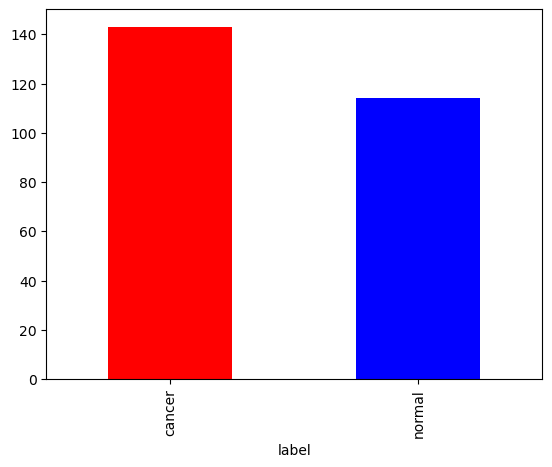

In [30]:
def label_specimen(specimen_str):
    s = specimen_str.lower()
    if re.search('normal', s):
        return 'normal'
    if re.search('cancer|tumour', s):
        return 'cancer'
df_icgc_prostate['label'] = df_icgc_prostate['specimen_type'].apply(lambda x: label_specimen(x))
df_icgc_prostate.groupby(['label'])['label'].value_counts().plot(kind='bar', color=['red', 'blue'])

In [31]:
na_columns = df_icgc_prostate.columns[df_icgc_prostate.isna().any()].tolist()
print(na_columns)

['ega_run_id', 'sftp_location', 'gdc_id', 'pdc_id']


In [32]:
df_icgc_prostate=df_icgc_prostate.drop(columns=na_columns)

Use cancer abbreviations table to map abbreviations to full names

In [33]:
df_cancer_abbrv = pd.read_csv("../data/icgc-cancer-abbreviations.csv")
df_cancer_abbrv[df_cancer_abbrv['abbreviation'].str.match('PRAD')]

,abbreviation,cancer
62,PRAD,Prostate Adenocarcinoma
63,PRAD,Prostate Cancer
64,PRAD,Prostate Cancer
65,PRAD,Prostate Adenocarcinoma
66,PRAD,Prostate Adenocarcinoma


In [34]:
df_icgc_prostate['project'].unique()

array(['PRAD-UK', 'PRAD-CA'], dtype=object)

In [35]:
#df_icgc_prostate['prostate_cancer_sample'] = df_icgc_prostate['project'].apply(lambda x: 1 if x in ['PRAD-UK', 'PRAD-CA'] else 0)
#df_icgc_prostate['prostate_cancer'].unique()

In [36]:
df_icgc_prostate

,sample,alt_file,objectid,file_name,icgc_donor,icgc_specimen_id,specimen_type,icgc_sample_id,project,study,data_type,experimental_strategy,format,analysisid,ega_dataset_id,ega_analysis_id,ega_file_id,pcawg,location,label
0,FI10013,FI10013.excord.bed.gz,964c2efe-ddec-5269-a042-5edf74c18585,2b678bca6a69d6f0bfb77f3194e4b1b7.bam,DO50427,SP111148,Normal - blood derived,SA528957,PRAD-UK,PCAWG,BAM,WGS,BAM,a9eac021-61e1-43aa-901f-cc1e2e960303,EGAD00001002126,EGAZ00001223153,EGAF00001084252,graylist,EGA,normal
1,FI10092,FI10092.excord.bed.gz,30f2d4c3-0c14-525b-a8ad-ae3b557886e1,89be54787406356f66e0ca61e24121bc.bam,DO51133,SP112952,Normal - blood derived,SA530603,PRAD-CA,PCAWG,BAM,WGS,BAM,47a324f6-88d4-4351-bf0f-341c65a1e26c,EGAD00001002128,EGAZ00001223179,EGAF00001084291,whitelist,EGA,normal
2,FI10093,FI10093.excord.bed.gz,c1b0f8bd-b2ad-5d03-84cd-942971bf193a,3bcb0039e46a4ca217d29b0c77a1ef7e.bam,DO51133,SP112953,Primary tumour - solid tissue,SA530604,PRAD-CA,PCAWG,BAM,WGS,BAM,b513c61d-ff71-4ddc-9888-1a406942069e,EGAD00001002128,EGAZ00001225228,EGAF00001162820,whitelist,EGA,cancer
3,FI10765,FI10765.excord.bed.gz,d3f67390-0e59-5f9f-8e26-4389f0ec1857,15b7c47c4cfa038c6a629d4c68a84914.bam,DO51136,SP112958,Normal - blood derived,SA530609,PRAD-CA,PCAWG,BAM,WGS,BAM,3d54d365-98ff-4a64-a1bd-99974d9d3730,EGAD00001002128,EGAZ00001225284,EGAF00001162988,whitelist,EGA,normal
4,FI10766,FI10766.excord.bed.gz,c2ec5d59-5ead-5792-aacb-80078ceff799,7a0090e6dabe350ecc19afb773d430e7.bam,DO51136,SP112959,Primary tumour - solid tissue,SA530610,PRAD-CA,PCAWG,BAM,WGS,BAM,b9b072b8-59fd-4d39-a538-03c05b907584,EGAD00001002128,EGAZ00001225318,EGAF00001163090,whitelist,EGA,cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,FI9458,FI9458.excord.bed.gz,5cf5097f-4d17-5fe3-a2ee-0e0262aa4a4d,691d9fe5c01c262b172b27e198457871.bam,DO51094,SP112874,Normal - blood derived,SA530589,PRAD-CA,PCAWG,BAM,WGS,BAM,df1958b1-2e8c-4df3-85c8-a74bf081f5c5,EGAD00001002128,EGAZ00001223259,EGAF00001084411,whitelist,EGA,normal
253,FI9459,FI9459.excord.bed.gz,bc3f7d54-152e-545a-b32d-169e744e4a90,29a7de80274515a883341d53db1fbcc0.bam,DO51094,SP112875,Primary tumour - solid tissue,SA530591,PRAD-CA,PCAWG,BAM,WGS,BAM,a6c8b882-19ab-4e16-85e3-c3058bf054a6,EGAD00001002128,EGAZ00001225294,EGAF00001163018,whitelist,EGA,cancer
254,FI9644,FI9644.excord.bed.gz,d7d1fb90-af4c-5731-afd1-627955b600f3,70464546bc8f729b2fc9a5357900e3f9.bam,DO51114,SP112914,Normal - blood derived,SA530529,PRAD-CA,PCAWG,BAM,WGS,BAM,e6303d3a-3240-489a-804b-7b83bc4239a7,EGAD00001002128,EGAZ00001223264,EGAF00001084927,whitelist,EGA,normal
255,FI9741,FI9741.excord.bed.gz,bcaaea56-b18d-5a0d-83d9-be4f6042700b,7f0db480fb535c84d5615f89eac17cdd.bam,DO51118,SP112922,Normal - blood derived,SA530545,PRAD-CA,PCAWG,BAM,WGS,BAM,bcae7980-d0b2-4982-9a60-737a27c7f2a7,EGAD00001002128,EGAZ00001223242,EGAF00001084894,whitelist,EGA,normal


In [42]:
cancer_samples = df_icgc_prostate[df_icgc_prostate['label'] == 'cancer'].reset_index(drop=True)
print(cancer_samples.shape)
cancer_samples.head()

(143, 20)


,sample,alt_file,objectid,file_name,icgc_donor,icgc_specimen_id,specimen_type,icgc_sample_id,project,study,data_type,experimental_strategy,format,analysisid,ega_dataset_id,ega_analysis_id,ega_file_id,pcawg,location,label
0,FI10093,FI10093.excord.bed.gz,c1b0f8bd-b2ad-5d03-84cd-942971bf193a,3bcb0039e46a4ca217d29b0c77a1ef7e.bam,DO51133,SP112953,Primary tumour - solid tissue,SA530604,PRAD-CA,PCAWG,BAM,WGS,BAM,b513c61d-ff71-4ddc-9888-1a406942069e,EGAD00001002128,EGAZ00001225228,EGAF00001162820,whitelist,EGA,cancer
1,FI10766,FI10766.excord.bed.gz,c2ec5d59-5ead-5792-aacb-80078ceff799,7a0090e6dabe350ecc19afb773d430e7.bam,DO51136,SP112959,Primary tumour - solid tissue,SA530610,PRAD-CA,PCAWG,BAM,WGS,BAM,b9b072b8-59fd-4d39-a538-03c05b907584,EGAD00001002128,EGAZ00001225318,EGAF00001163090,whitelist,EGA,cancer
2,FI10784,FI10784.excord.bed.gz,fb4faccb-cbcd-5706-bb5a-a8180c7f22bd,2238ab07083b519abceb375f12d7f5f9.bam,DO51067,SP112821,Primary tumour - solid tissue,SA530479,PRAD-CA,PCAWG,BAM,WGS,BAM,e2dd4dfe-980c-4587-bde6-7e9f466d5848,EGAD00001002128,EGAZ00001223260,EGAF00001084921,whitelist,EGA,cancer
3,FI11979,FI11979.excord.bed.gz,fd22f0c2-d50f-551c-9b11-5496df8a56ef,1c2dad03e47d34118d63bf4cb89d97a4.bam,DO51142,SP112971,Primary tumour - solid tissue,SA530622,PRAD-CA,PCAWG,BAM,WGS,BAM,2b5fe918-e0f8-4c1f-8024-ddcd55557b8d,EGAD00001002128,EGAZ00001225221,EGAF00001162799,whitelist,EGA,cancer
4,FI12251,FI12251.excord.bed.gz,33623629-be74-5373-8457-0e43f805b935,f1c61be3f2beb330e3aa731d8c325ecb.bam,DO51159,SP113005,Primary tumour - solid tissue,SA530656,PRAD-CA,PCAWG,BAM,WGS,BAM,64e6a38c-cf95-4264-b039-99a34dfe3d1a,EGAD00001002128,EGAZ00001225184,EGAF00001160759,whitelist,EGA,cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,FI7640,FI7640.excord.bed.gz,c4f6cca8-a8eb-5e9d-a9e7-99d26e6ae67a,0eeb9f88bab46eee4e63871e60a1b5c2.bam,DO51096,SP112879,Primary tumour - solid tissue,SA530599,PRAD-CA,PCAWG,BAM,WGS,BAM,1dd79880-2c19-48a0-8bab-513034d9c9d1,EGAD00001002128,EGAZ00001225280,EGAF00001162976,whitelist,EGA,cancer
139,FI7698,FI7698.excord.bed.gz,319995f4-5632-5189-83d8-ba63c797ef28,7d14b175eec47da9c12e076290570b07.bam,DO51051,SP112789,Primary tumour - solid tissue,SA530440,PRAD-CA,PCAWG,BAM,WGS,BAM,8e961712-e0cf-4748-8fca-31ebaf649a4d,EGAD00001002128,EGAZ00001225215,EGAF00001162781,whitelist,EGA,cancer
140,FI8875,FI8875.excord.bed.gz,d0f782c5-3615-5cc4-9ac4-6bafc93d5caf,23acf4688d7c695ff52d0147e6c9ae2f.bam,DO51103,SP112893,Primary tumour - solid tissue,SA530488,PRAD-CA,PCAWG,BAM,WGS,BAM,92cca4da-8bd8-4dcd-a0be-1049ee1c16af,EGAD00001002128,EGAZ00001223209,EGAF00001084336,whitelist,EGA,cancer
141,FI9459,FI9459.excord.bed.gz,bc3f7d54-152e-545a-b32d-169e744e4a90,29a7de80274515a883341d53db1fbcc0.bam,DO51094,SP112875,Primary tumour - solid tissue,SA530591,PRAD-CA,PCAWG,BAM,WGS,BAM,a6c8b882-19ab-4e16-85e3-c3058bf054a6,EGAD00001002128,EGAZ00001225294,EGAF00001163018,whitelist,EGA,cancer


For now, we will include metastatic tumour samples in the prostate cancer index

In [44]:
cancer_samples.specimen_type.value_counts()
cancer_samples

specimen_type
Primary tumour - solid tissue                         108
Metastatic tumour - metastasis to distant location     20
Metastatic tumour - lymph node                         15
Name: count, dtype: int64

In [48]:
cancer_samples.alt_file.sort_values().to_csv('../data/meta/tumour_samples.txt',sep='\t',header=False,index=False)

In [45]:
#df_icgc_prostate.to_csv('../data/meta/icgc-GRCh37-prostate_cancer.ped',sep='\t',index=False)
cancer_samples.to_csv('../data/meta/icgc-GRCh37-prostate_cancer.ped',sep='\t',index=False)